In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#1.Data Exploration (EDA)
#Load the dataset and display the first few rows.
df = pd.read_csv('sales_data.csv')
print(df.head())

         Date Region Product Category  Units Sold  Revenue  Profit Margin (%)  \
0  2023-04-13   East      Electronics          18      761               9.82   
1  2023-12-15  South             Toys          25     4744              24.52   
2  2023-09-28  North         Clothing          12      411              21.03   
3  2023-04-17   West         Clothing          15     3020              24.19   
4  2023-03-13   West      Electronics          26     1182              14.76   

  Customer Type  
0           New  
1     Returning  
2     Returning  
3     Returning  
4           New  


In [3]:
#Get summary statistics (mean, median, standard deviation)
summary_stats = df.describe()
median_values = df.median(numeric_only=True)
print("Summary Statistics:\n", summary_stats)
print("\nMedian Values:\n", median_values)

Summary Statistics:
        Units Sold      Revenue  Profit Margin (%)
count  500.000000   500.000000          500.00000
mean    25.158000  2565.624000           15.19228
std     13.812698  1413.019626            5.78963
min      1.000000   101.000000            5.06000
25%     13.000000  1347.500000           10.12000
50%     25.000000  2598.500000           15.47000
75%     37.000000  3816.750000           20.29500
max     49.000000  4995.000000           24.97000

Median Values:
 Units Sold             25.00
Revenue              2598.50
Profit Margin (%)      15.47
dtype: float64


In [4]:
#Identify and handle outliers.
numerical_cols = df.select_dtypes(include=[np.number])

Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers:\n", outliers)

df = df[~((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))).any(axis=1)]




Outliers:
 Units Sold           0
Revenue              0
Profit Margin (%)    0
dtype: int64


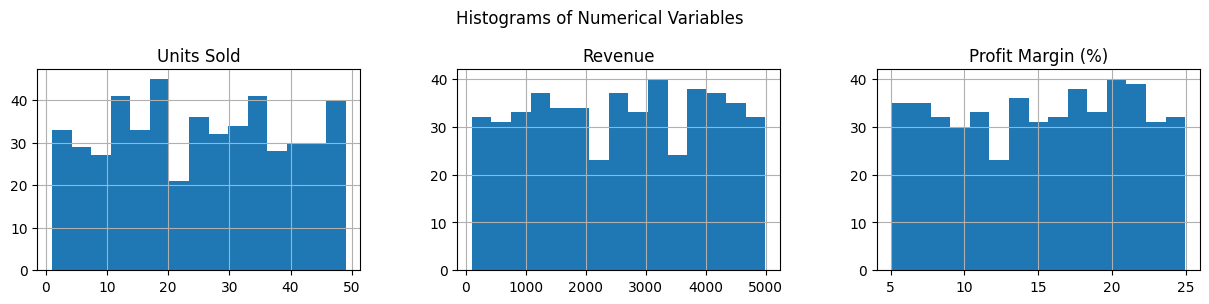

In [5]:
#2.Univariate and Multivariate Analysis
#Generate histograms and boxplots for numerical variables.
numerical_cols.hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Histograms of Numerical Variables')
plt.show()





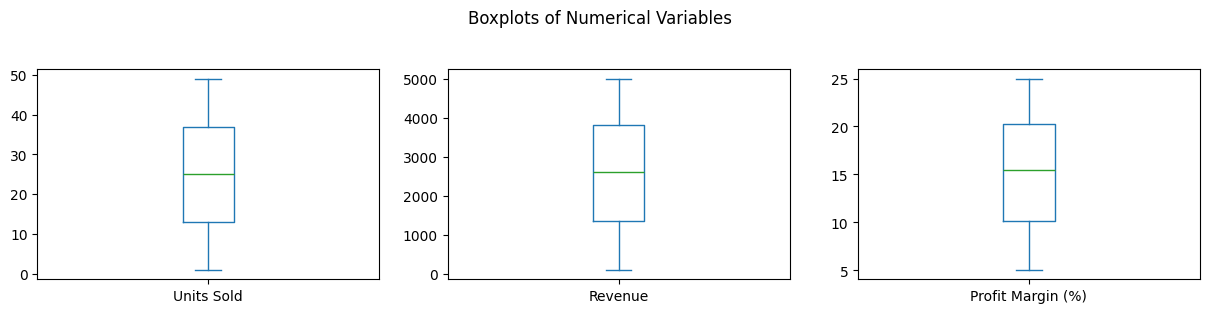

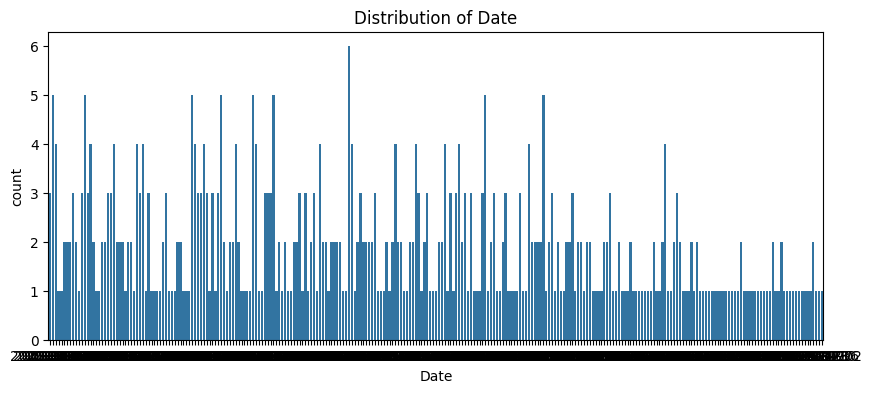

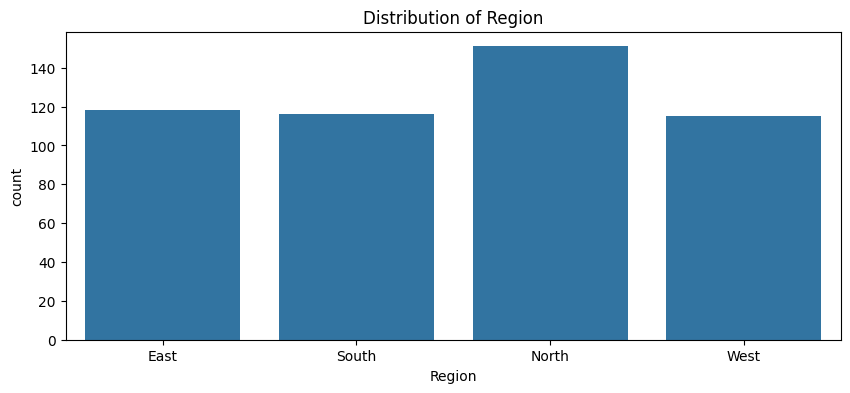

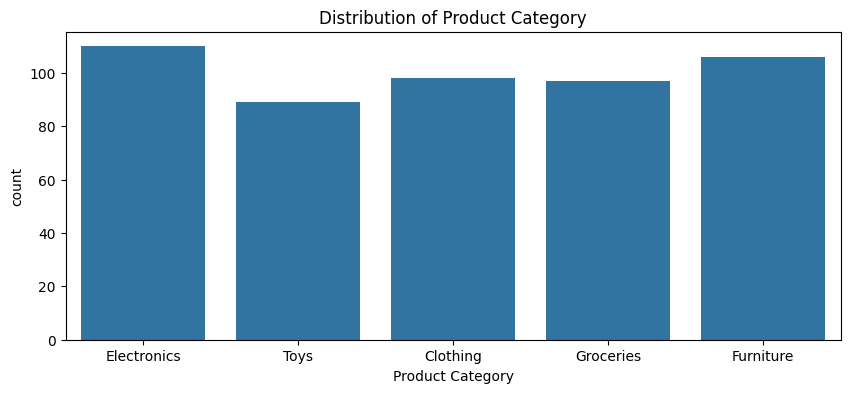

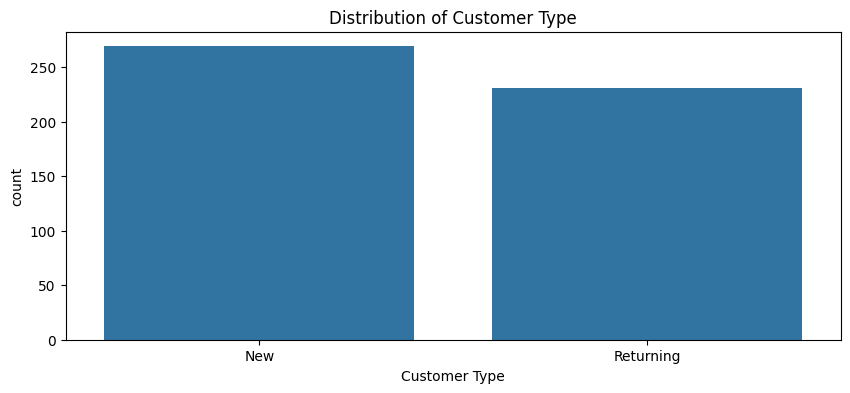

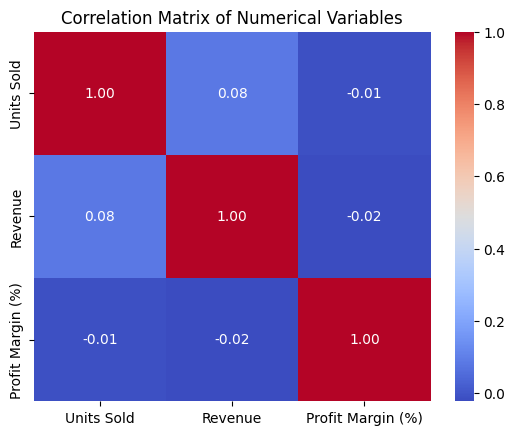

In [6]:
# Generate boxplots for numerical variables
numerical_cols.plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 6))
plt.suptitle('Boxplots of Numerical Variables')
plt.show()


categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

corr_matrix = numerical_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

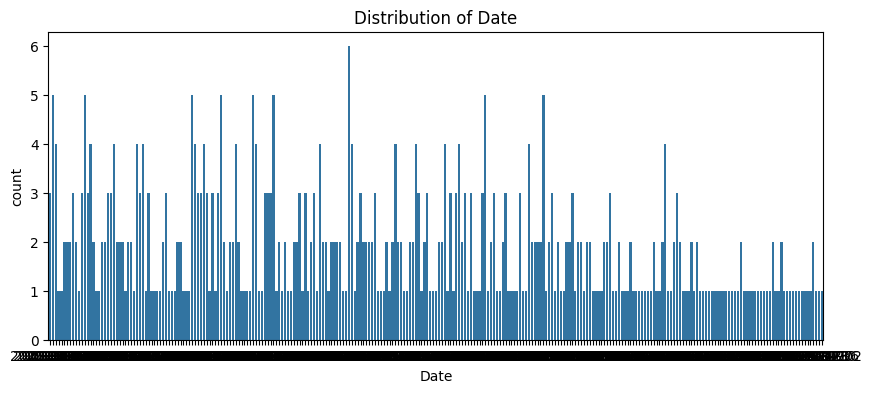

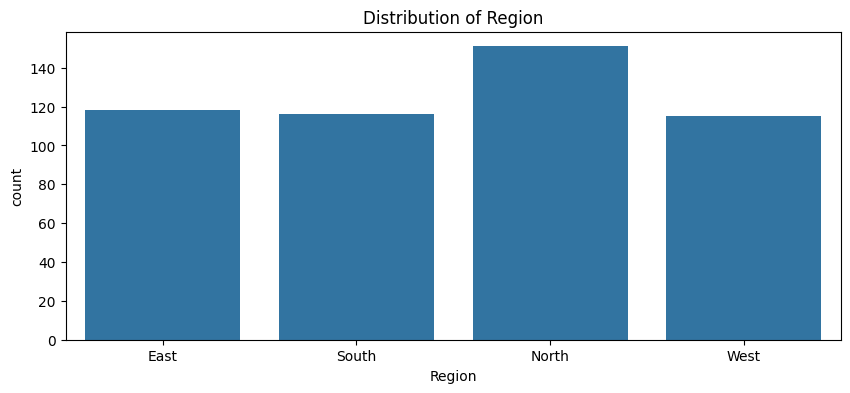

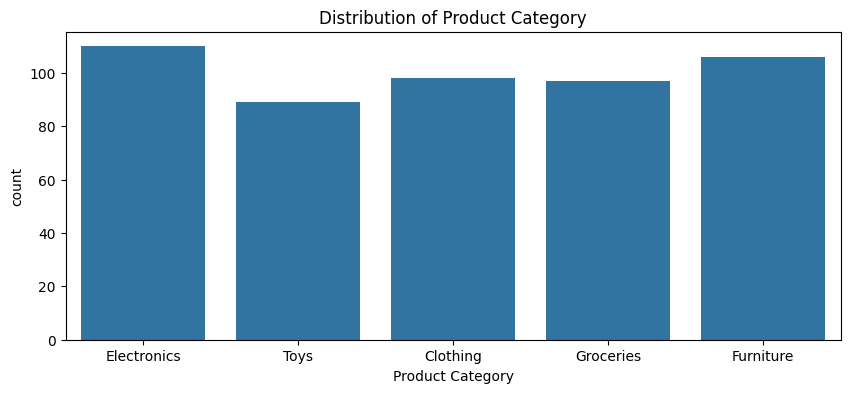

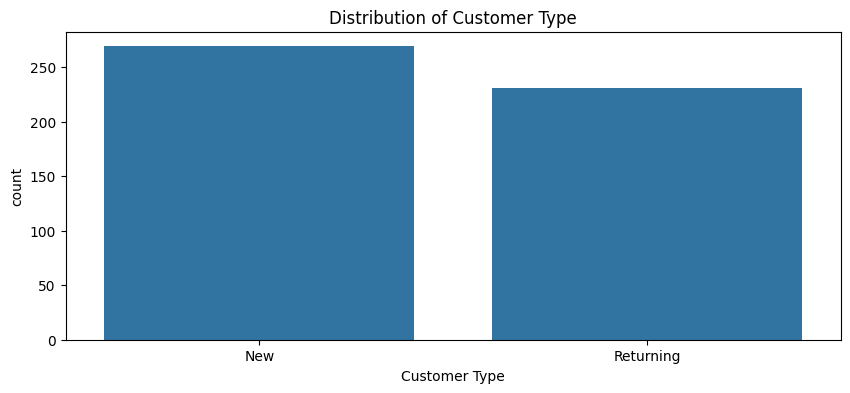

In [7]:
#Create bar charts to visualize the distribution of categorical variables.
for col in categorical_cols.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=categorical_cols)
    plt.title(f'Distribution of {col}')
    plt.show()



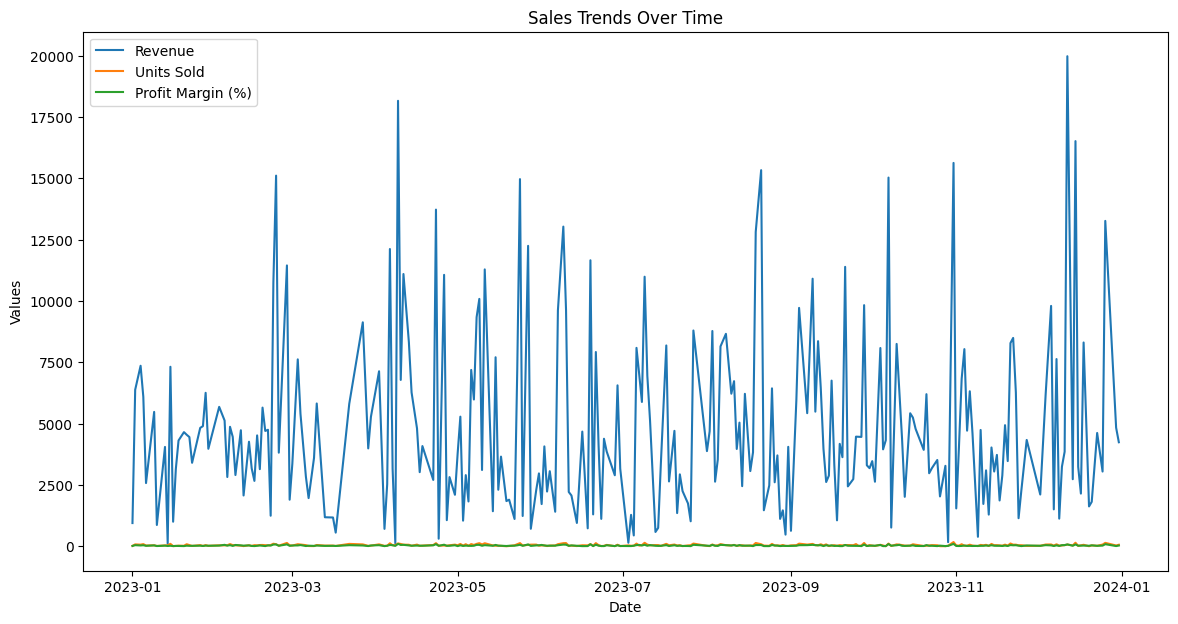

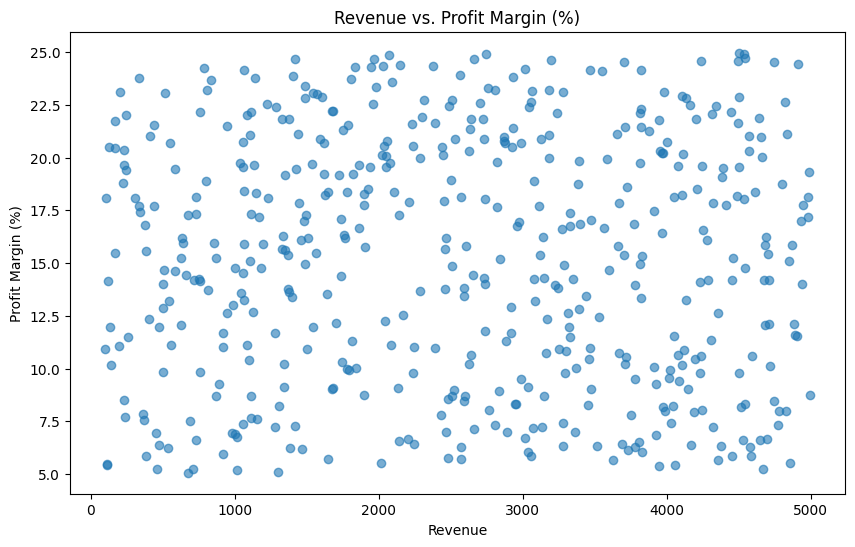

In [8]:
#3.Data Visualization
#Create line charts to show sales trends over time.
df['Date'] = pd.to_datetime(df['Date'])
daily_sales_trends = df.groupby('Date').sum()

plt.figure(figsize=(14, 7))
plt.plot(daily_sales_trends.index, daily_sales_trends['Revenue'], label='Revenue')
plt.plot(daily_sales_trends.index, daily_sales_trends['Units Sold'], label='Units Sold')
plt.plot(daily_sales_trends.index, daily_sales_trends['Profit Margin (%)'], label='Profit Margin (%)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Sales Trends Over Time')
plt.legend()
plt.show()

#Use scatter plots to analyze revenue vs. profit margin
plt.figure(figsize=(10, 6))
plt.scatter(df['Revenue'], df['Profit Margin (%)'], alpha=0.6)
plt.xlabel('Revenue')
plt.ylabel('Profit Margin (%)')
plt.title('Revenue vs. Profit Margin (%)')
plt.show()


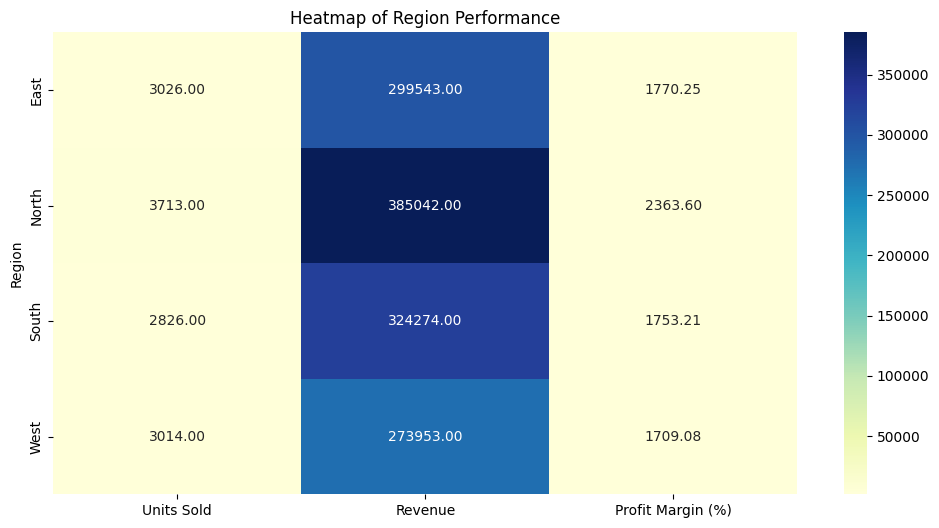

In [9]:
#Generate heatmaps to identify high-performing regions.
region_performance = df.groupby('Region').sum(numeric_only=True)

plt.figure(figsize=(12, 6))
sns.heatmap(region_performance[['Units Sold', 'Revenue', 'Profit Margin (%)']], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Region Performance')
plt.show()




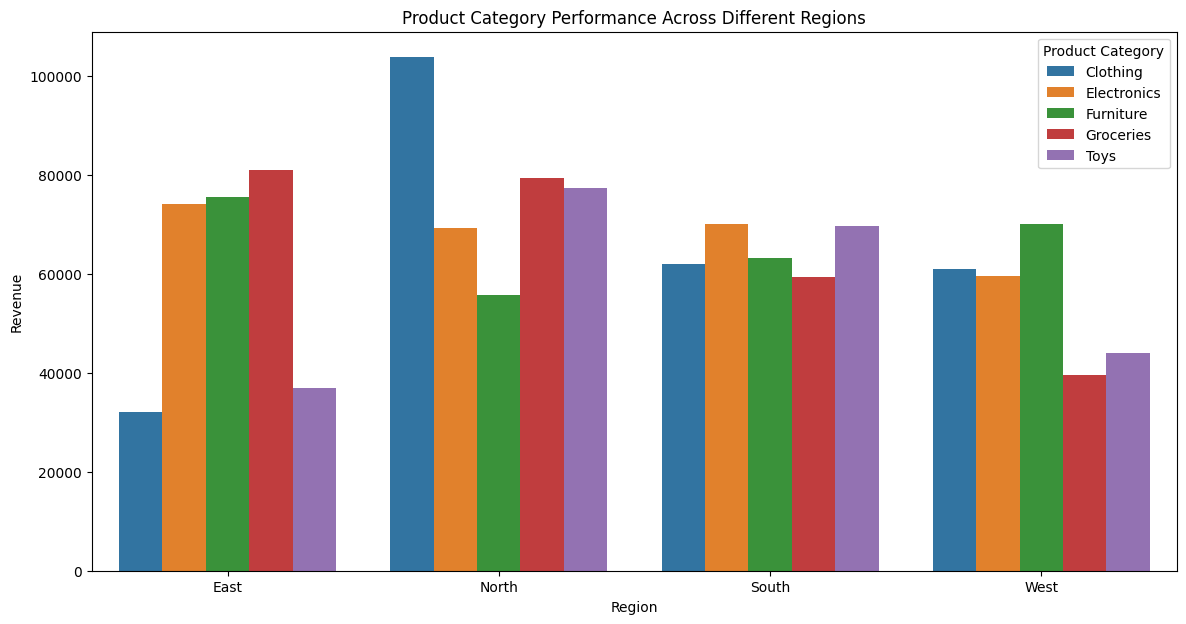

In [10]:
#Build bar plots showing product category performance across different regions.
product_category_performance = df.groupby(['Region', 'Product Category']).sum(numeric_only=True).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Region', y='Revenue', hue='Product Category', data=product_category_performance)
plt.title('Product Category Performance Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.legend(title='Product Category')
plt.show()

In [11]:
#4.Insights & Business Recommendations

#Identify the best-performing region based on revenue and profit.
best_region_revenue = region_performance['Revenue'].idxmax()
best_region_profit = region_performance['Profit Margin (%)'].idxmax()

print(f"The best-performing region based on revenue is: {best_region_revenue}")
print(f"The best-performing region based on profit margin is: {best_region_profit}")



The best-performing region based on revenue is: North
The best-performing region based on profit margin is: North


In [12]:
#Find which product category generates the highest revenue
highest_revenue_category = product_category_performance.loc[product_category_performance['Revenue'].idxmax(), 'Product Category']
print(f"The product category that generates the highest revenue is: {highest_revenue_category}")


The product category that generates the highest revenue is: Clothing


In [13]:
# Define strategies for underperforming regions
underperforming_strategies = {
    'East': [
        'Increase Profit Margins through Cost Efficiency.',
        'Re-evaluate Pricing Strategy.',
        'Expand product range to meet diverse customer needs.',
        'Expand Retail Presence & Local Partnerships.',
    ],
    'West': [
        'Targeted Marketing Campaigns.',
        'Loyalty & Retention Programs.',
        'Optimize Product Offerings Based on Demand.',
        'Improve Market Penetration & Customer Engagement.',
        'Strengthen Sales & Distribution Channels.',
        'Expand Retail Presence & Local Partnerships.'
        
    ]
}

print("Strategies for underperforming regions:")
for region, strategies in underperforming_strategies.items():
    print(f"\nRegion: {region}")
    for strategy in strategies:
        print(f"- {strategy}")


Strategies for underperforming regions:

Region: East
- Increase Profit Margins through Cost Efficiency.
- Re-evaluate Pricing Strategy.
- Expand product range to meet diverse customer needs.
- Expand Retail Presence & Local Partnerships.

Region: West
- Targeted Marketing Campaigns.
- Loyalty & Retention Programs.
- Optimize Product Offerings Based on Demand.
- Improve Market Penetration & Customer Engagement.
- Strengthen Sales & Distribution Channels.
- Expand Retail Presence & Local Partnerships.
